In [1]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing dataset
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(10)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
Patiant-06,Usually,Sometimes,Sometimes,Most-Often,NO,YES,YES,YES,NO,NO,NO,NO,YES,NO,3 From 10,5 From 10,5 From 10,Depression
Patiant-07,Seldom,Usually,Seldom,Sometimes,YES,YES,YES,NO,YES,YES,NO,YES,YES,YES,7 From 10,2 From 10,9 From 10,Bipolar Type-1
Patiant-08,Usually,Sometimes,Sometimes,Sometimes,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,5 From 10,5 From 10,5 From 10,Normal
Patiant-09,Most-Often,Seldom,Most-Often,Usually,YES,YES,YES,NO,YES,YES,NO,YES,NO,NO,8 From 10,2 From 10,3 From 10,Bipolar Type-2


In [3]:
#summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [4]:
df.drop(columns=['Sexual Activity'], inplace=True)


In [5]:
# unique values in each columns
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [6]:
# merging same values in 'Suicidal thoughts' column
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

In [7]:
# # drawing plot for each columns

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)# Suppress FutureWarning messages

# for i in df.columns[4:-4]:
#     table=pd.pivot_table(df,index='Expert Diagnose',aggfunc='count',columns=i,values='Optimisim')
#     plot=px.bar(table,color_discrete_sequence=['red','green'],labels={'value':'Count'},title=f"Having {i} in each groups")
#     plot.show()
    
    
# dic=dict()
# values=['blue','purple','black','orange','red','skyblue','green']
# keys=df.columns[:-1].drop(df.columns[4:-4])
# for i in range(len(keys)):
#        dic.update({keys[i]:values[i]})


# for i in range(7):
   
#       plott=px.density_heatmap(data_frame=df,x='Expert Diagnose',y=list(dic)[i],color_continuous_scale=['white',list(dic.values())[i]])
#       plott.update_layout(go.Layout(yaxis={'categoryarray':df[list(dic)[i]].sort_values(inplace=False).unique(),'title':list(dic)[i]},xaxis={'categoryarray':['Bipolar Type-1','Bipolar Type-2','Depression','Normal']},hovermode='closest'))
#       plott.show()

In [8]:
# We have catogorical features, so we need to encode them

from sklearn.preprocessing import LabelEncoder
encoders={} 
for i in df.columns[:-1]:
    encoders[i]=LabelEncoder() # define individual encoder for each column
    encoders[i].fit(df[i])
    df[i]=encoders[i].transform(df[i])

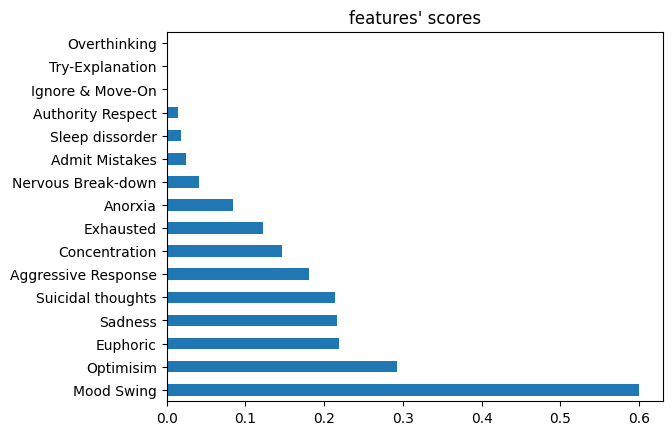

In [9]:
# Selecting best features in order to increase model's performance

from sklearn.feature_selection import mutual_info_classif
feature_selection=SelectKBest(score_func=mutual_info_classif)
feature_selection=feature_selection.fit(df[df.columns[:-1]],df[df.columns[-1]])

features_scores=pd.Series(feature_selection.scores_,df.columns[:-1])
features_scores.nlargest(18).plot(kind='barh',title="features' scores")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode label (y_train dan y_test jika perlu)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


In [15]:
# defining train and test set
x_train,x_test,y_train,y_test=train_test_split(df[features_scores.nlargest(5).index],df[df.columns[-1]],test_size=0.3,random_state=2,shuffle=True)

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(x_train, y_train_encoded)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


d:\DBS\Project Capstone\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 300], 'subsample': [0.8, 1]},
             scoring='accuracy', verbose=2)

In [17]:
# best parameters for model
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

In [20]:
from sklearn.metrics import classification_report

# Encode y_test dengan encoder yang sama
y_test_encoded = le.transform(y_test)

# Prediksi
y_predict_encoded = grid_search.predict(x_test)

# Evaluasi
print(classification_report(y_test_encoded, y_predict_encoded, target_names=le.classes_))


                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.88      0.93         8
Bipolar Type-2       0.91      1.00      0.95        10
    Depression       0.88      0.88      0.88         8
        Normal       0.90      0.90      0.90        10

      accuracy                           0.92        36
     macro avg       0.92      0.91      0.92        36
  weighted avg       0.92      0.92      0.92        36



In [21]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,3,Bipolar Type-2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,1,4,Depression
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,4,6,Bipolar Type-1
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,1,1,Bipolar Type-2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,4,2,Depression
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,Bipolar Type-1
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,4,2,Bipolar Type-2
